In [1]:
from silo_to_yt import *
import sys
import pickle
yt.set_log_level("ERROR")

In [2]:
data_path = '/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/red_z_res/wr140-mhd-l7n256/'
# data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n128/"
evolution = make_snapshots(data_path)
# print(evolution[0])
# ts = get_ts(evolution[202:203], quantities=["density"])
ds = get_ds(evolution[240], quantities=["density", "hydrogen_density"])
ds.field_list

Info from silo files:
Basename of silo files: wr140_mhd_cool_d3l7n256
Simulation Info: 7 levels
Number of snapshots: 285


[('gas', 'density'), ('gas', 'hydrogen_density')]


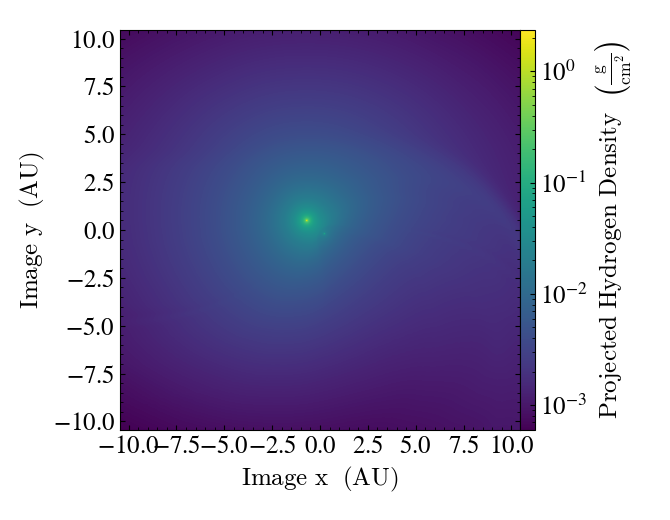

In [5]:
prj = yt.OffAxisProjectionPlot(ds, normal = [-0.591,0.588,0.552], fields='hydrogen_density', north_vector=[1,0,0])
prj.set_cmap("hydrogen_density", "viridis")
prj.set_figure_size(4)
# prj.zoom(0.25)
# prj.annotate_grids()
prj.show()

In [5]:
file = evolution[240]

In [18]:
data = ReadData(file)
sim_time = data.sim_time()
N_levels = data.nlevels()
N_grids = data.ngrid()[::-1]
Dom_size = max(data.level_max()) - max(data.level_min())

data_den = data.get_3Darray("Density")['data']

In [19]:
data_ngmask = data.get_3Darray("NG_Mask")['data']

In [8]:
# np.where(data_ngmask[0] == 0)

In [20]:
for level in range(N_levels):
    args = np.where(data_ngmask[level] == 0)
    data_den_new = data_den
    data_den_new[level][args] = 0

    

(array([16, 16, 16, ..., 47, 47, 47]),
 array([ 64,  64,  64, ..., 191, 191, 191]),
 array([ 64,  65,  66, ..., 189, 190, 191]))

In [10]:
# data_den[data_ngmask == 0] = 0

In [11]:
data_den_new = data.get_3Darray("Density")['data']
data_ngmask = data.get_3Darray("NG_Mask")['data']
data_den_new[data_ngmask == 0] = 0

In [17]:
data_den_new[5]

array([[[4.61009948e-17, 4.51626310e-17, 4.33341811e-17, ...,
         1.52985736e-16, 1.56546398e-16, 1.59252878e-16],
        [4.72473825e-17, 4.66135835e-17, 4.54515641e-17, ...,
         1.56831620e-16, 1.60106839e-16, 1.62691794e-16],
        [4.83087502e-17, 4.78259896e-17, 4.70753037e-17, ...,
         1.60568973e-16, 1.63608739e-16, 1.66086729e-16],
        ...,
        [3.08725819e-16, 3.13827174e-16, 3.18829144e-16, ...,
         4.32291343e-16, 4.25098166e-16, 4.18242534e-16],
        [3.07924934e-16, 3.13129900e-16, 3.18232165e-16, ...,
         4.31739590e-16, 4.24540036e-16, 4.17696673e-16],
        [3.07153315e-16, 3.12419400e-16, 3.17610311e-16, ...,
         4.31149126e-16, 4.23982434e-16, 4.17081542e-16]],

       [[4.56797472e-17, 4.45404004e-17, 4.21299005e-17, ...,
         1.52997077e-16, 1.56503273e-16, 1.59229849e-16],
        [4.69188276e-17, 4.62078890e-17, 4.46726595e-17, ...,
         1.56827292e-16, 1.60060908e-16, 1.62657115e-16],
        [4.80180042e-17, 